## <center>__FIND OPTIMUM TEMPERATURE RANGE__<center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fitter import Fitter, get_common_distributions
import scipy
from scipy import stats

In [3]:
#data ETL
data_path = "../dataset/clean_data_suhu.xlsx"

In [4]:
df = pd.read_excel(data_path)
df.head(10)

,ruang1_Suhu,ruang2_Suhu,ruang3_Suhu,ruang4_Suhu,ruang5_Suhu,ruang6_Suhu,suhu_ruangan_1,suhu_ruangan_2,suhu_ruangan_3
0,31.6,32.4,31.4,31.9,32.2,31.4,32.0,31.65,31.8
1,31.6,32.4,31.4,31.9,32.2,31.4,32.0,31.65,31.8
2,31.6,32.4,31.4,31.9,32.2,31.4,32.0,31.65,31.8
3,31.6,32.4,31.4,31.9,32.2,31.4,32.0,31.65,31.8
4,31.6,32.4,31.4,31.9,32.2,31.4,32.0,31.65,31.8
5,31.6,32.4,31.4,31.9,32.2,31.4,32.0,31.65,31.8
6,31.6,32.4,31.4,31.9,32.2,31.4,32.0,31.65,31.8
7,31.6,32.4,31.4,31.9,32.2,31.4,32.0,31.65,31.8
8,31.6,32.4,31.4,31.9,32.2,31.4,32.0,31.65,31.8
9,31.6,32.4,31.4,31.9,32.2,31.4,32.0,31.65,31.8


In [7]:
#buang data yang tidak perlu
df = df.drop([" ruang1_Suhu", " ruang2_Suhu", " ruang3_Suhu", " ruang4_Suhu", " ruang5_Suhu", " ruang6_Suhu"], axis=1)
df.head(10)

,suhu_ruangan_1,suhu_ruangan_2,suhu_ruangan_3
0,32.0,31.65,31.8
1,32.0,31.65,31.8
2,32.0,31.65,31.8
3,32.0,31.65,31.8
4,32.0,31.65,31.8
5,32.0,31.65,31.8
6,32.0,31.65,31.8
7,32.0,31.65,31.8
8,32.0,31.65,31.8
9,32.0,31.65,31.8


In [8]:
#check nilai 0
(df == 0).any()

suhu_ruangan_1    False
suhu_ruangan_2    False
suhu_ruangan_3    False
dtype: bool

## <center> Data Cleaning <center>

In [10]:
#check Nan & 0 value and relace it with avg depent on column
mean_df = df.mean()
df_clean = df.replace(0, mean_df)

In [11]:
(df_clean==0).any()

suhu_ruangan_1    False
suhu_ruangan_2    False
suhu_ruangan_3    False
dtype: bool

In [14]:
#check Nan Value
df_clean.isna().any()

suhu_ruangan_1    False
suhu_ruangan_2    False
suhu_ruangan_3    False
dtype: bool

## <center> Statistik Deskriptif <center>

In [15]:
df_clean.describe()

,suhu_ruangan_1,suhu_ruangan_2,suhu_ruangan_3
count,138415.000000,138415.000000,138415.000000
mean,29.237148,29.220202,29.494821
std,2.195691,2.062943,2.228087
min,15.700000,24.600000,16.000000
25%,27.500000,27.600000,27.650000
50%,29.000000,29.050000,29.350000
75%,30.800000,30.700000,31.150000
max,38.650000,38.400000,36.450000


## <center>Visualisiasi Data<center>

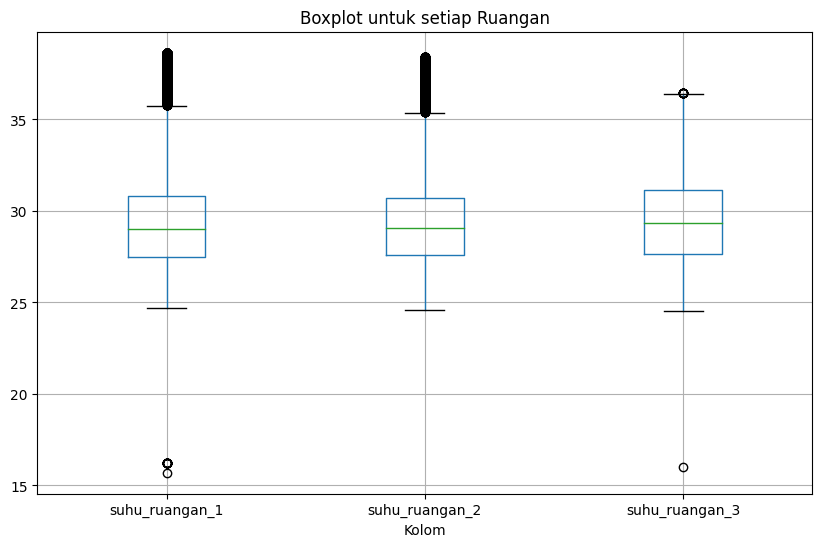

In [17]:
# buat boxplot untuk setiap ruangan
fig, ax = plt.subplots(figsize=(10,6))

df_clean.boxplot(ax=ax)
ax.set_title('Boxplot untuk setiap Ruangan')
ax.set_xlabel('Kolom')

# tampilkan figure
plt.show()

Fitting 4 distributions: 100%|██████████| 4/4 [00:26<00:00,  6.53s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.057742,inf,-2.033239e+06,inf,0.034163,8.704812e-141
lognorm,0.062562,2128.495276,-2.022154e+06,inf,0.045472,3.794109e-249
gamma,0.063289,1981.626601,-2.020555e+06,inf,0.046460,4.434767e-260
norm,0.068937,1343.627952,-2.008735e+06,inf,0.052850,0.000000e+00


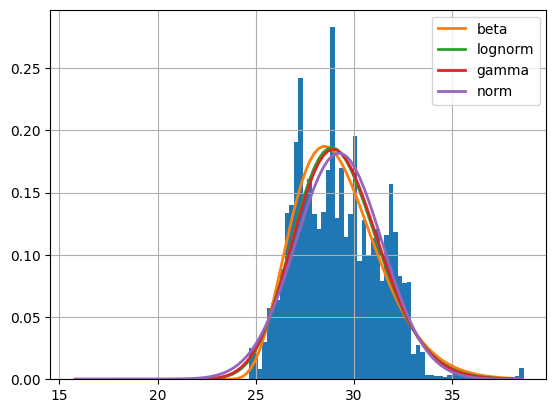

In [23]:
#find best data destribution

data = df_clean['suhu_ruangan_1']
label = 'suhu_ruangan_1'

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "norm"])

f.fit()
f.summary()

In [24]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 6.295495681135127,
  'b': 44.743923499783946,
  'loc': 23.281737139709946,
  'scale': 48.292350427257375}}

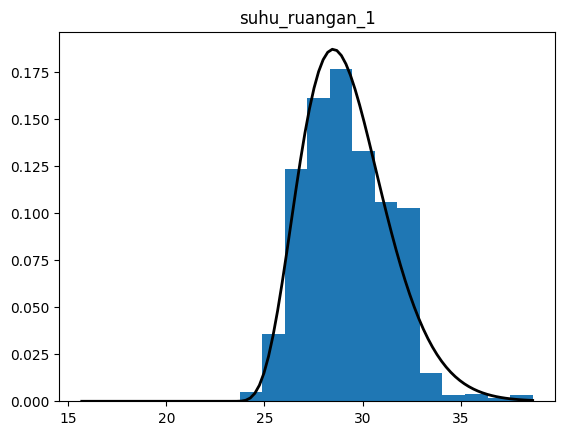

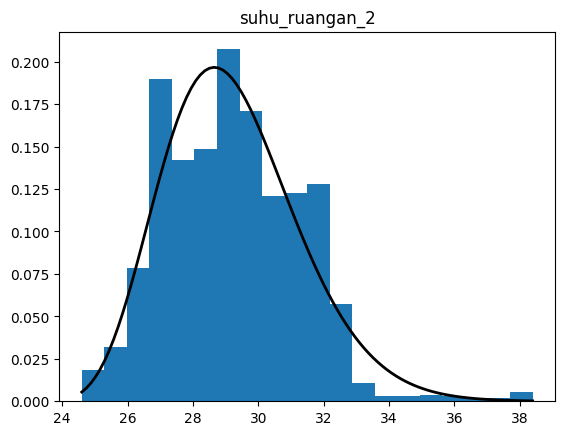

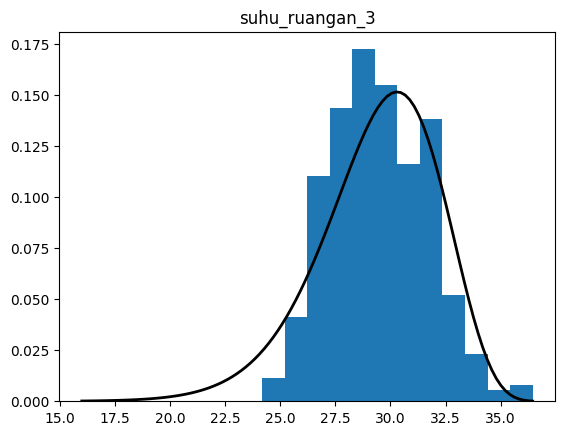

In [25]:
#histogram and distribution

def hist_and_dist(data, column_name):
      a, b, loc, scale = stats.beta.fit(data)
      x = np.linspace(min(data), max(data), 100)
      pdf = stats.beta.pdf(x, a, b, loc, scale)
      plt.plot(x, pdf, 'k', linewidth=2)
      plt.hist(data, bins=20, density=True)
      plt.title(column_name)
      plt.show()
      
for column in df_clean.columns:
      hist_and_dist(df_clean[column], column)

In [26]:
#check skewwness
skewness = df_clean.skew()
print("Tingkat Skewwness Dataset ..\n")
print(skewness)

Tingkat Skewwness Dataset ..

suhu_ruangan_1    0.523554
suhu_ruangan_2    0.527161
suhu_ruangan_3    0.249251
dtype: float64


## <center> Optimum Range <center>

In [27]:
'''
Anything above Q3   +   1.5   x   IQR is an outlier
Anything below Q1   -   1.5   x   IQR is an outlier
'''

#Optimum range dengan Quartile

Q1 = df_clean.quantile(0.25)
Q3 = df_clean.quantile(0.75)

# mencari range data yang optimum
lower_range = Q1 
upper_range = Q3

# menampilkan range data yang optimum
print("Range data optimum untuk setiap Ruangan:")

for i, columns in enumerate(df_clean.columns):
      print(f'Range optimum {columns} ({lower_range[i]} - {upper_range[i]})')

Range data optimum untuk setiap Ruangan:
Range optimum suhu_ruangan_1 (27.5 - 30.8)
Range optimum suhu_ruangan_2 (27.6 - 30.700000000000003)
Range optimum suhu_ruangan_3 (27.65 - 31.15)


In [28]:
#Optimum range dengan pendekatan mean dan standar deviasi
#optimum_range = [mean - factor * standar_deviasi] sampai [mean + factor * standar_deviasi]

def find_optimum_range_STAT(data, colum_name):
      mean = data.mean()
      std_dev = data.std()
      optimum_range = [mean - 1 * std_dev, mean + 1 * std_dev]
      print(f'Range optimum {colum_name} ({optimum_range[0]} - {optimum_range[1]})')

print("Range data optimum untuk setiap Ruangan:")
for column in df_clean.columns.values:
      find_optimum_range_STAT(df_clean[column], column)
      

Range data optimum untuk setiap Ruangan:
Range optimum suhu_ruangan_1 (27.041456852415234 - 31.432839286009074)
Range optimum suhu_ruangan_2 (27.15725875086014 - 31.283145107103234)
Range optimum suhu_ruangan_3 (27.266734222489315 - 31.72290851854309)


In [29]:
#Optimum range dengan pendekatan Machine learning K-Means Clustering

from sklearn.cluster import KMeans
from loguru import logger as log

def find_optimum_range_KMEANs(data, column_name, vis_type):
      
      
      if vis_type == 'scatter':
            data = np.array(sorted(data.values))
            data = data.reshape(-1, 1)
            kmeans = KMeans(n_clusters=3)
            kmeans.fit(data)
            labels = kmeans.predict(data)
            centers = kmeans.cluster_centers_
            plt.scatter(data, np.zeros_like(data), c=labels)
            plt.scatter(centers, np.zeros_like(centers), c='red', marker='x', s=200)
            plt.title(column_name)
            plt.xlabel("Suhu")
            plt.show()
            
      elif vis_type == 'histogram':
            data = np.array(sorted(data.values))
            data = data.reshape(-1, 1)
            kmeans = KMeans(n_clusters=3)
            kmeans.fit(data)
            labels = kmeans.predict(data)
            centers = kmeans.cluster_centers_
            bin_edges = np.histogram_bin_edges(data, bins=100)
            for i in range(kmeans.n_clusters):
                  plt.hist(data[labels==i], bins=bin_edges, alpha=0.5, edgecolor='black', linewidth=1.2, label=f'Cluster {i+1}')
            plt.legend()
            plt.title(column_name)
            plt.xlabel("Suhu")
            plt.show()
            
      else:
            log.warning("Tipe Visualisasi Tidak Ada!!")

c:\Users\User\anaconda3\envs\DS\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


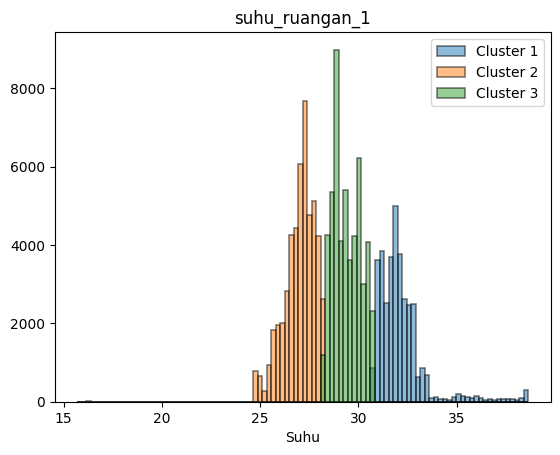

c:\Users\User\anaconda3\envs\DS\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


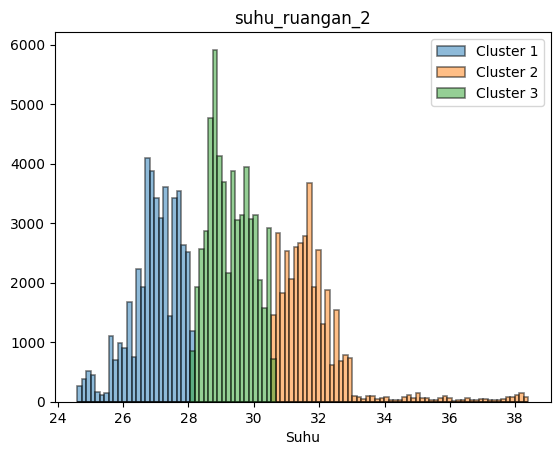

c:\Users\User\anaconda3\envs\DS\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


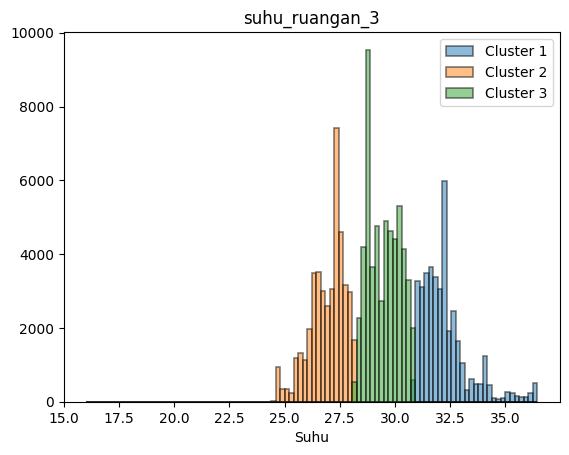

In [30]:
for column in df_clean.columns:
      find_optimum_range_KMEANs(df_clean[column], column, "histogram")

c:\Users\User\anaconda3\envs\DS\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


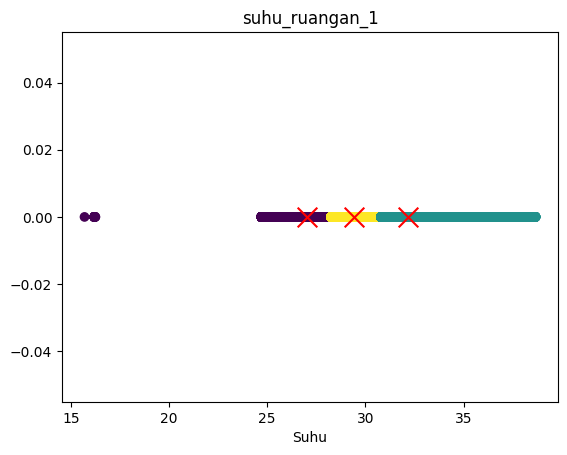

c:\Users\User\anaconda3\envs\DS\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


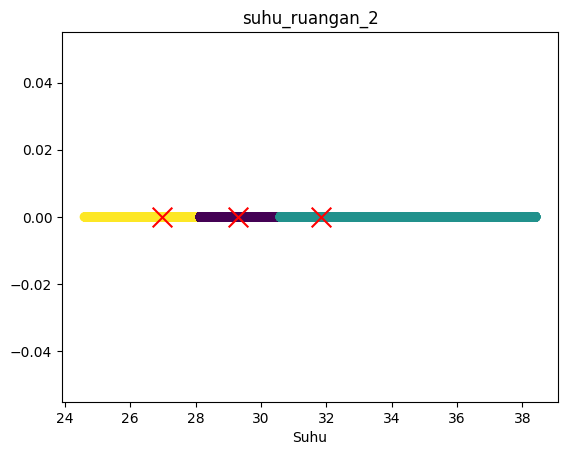

c:\Users\User\anaconda3\envs\DS\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


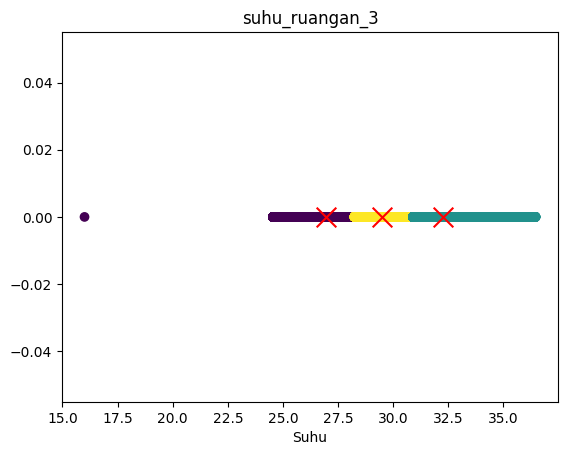

In [31]:
for column in df_clean.columns:
      find_optimum_range_KMEANs(df_clean[column], column, "scatter")